In [2]:
# -*- coding: euc-kr -*-

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from qutip import *

%matplotlib inline

## Master Equation Solver for Single-Qubit Dynamics

In [3]:
# Coefficients
delta = 2*np.pi

# Dissipation coefficient
g = 0.25

# Hamiltonian
H = delta / 2.0 * sigmax()

# Collapse operators
c_ops = [np.sqrt(g) * sigmaz()]

# Initial quantum state for single qubit
psi_0 = basis(2,0)

# Time linspace
tlist = np.linspace(0,5,100)

In [4]:
# Master equation solve
res = mesolve(H, psi_0, tlist, c_ops, [sigmaz()])

In [5]:
sz_analytic = np.cos(2*np.pi*tlist) * np.exp(-tlist*g)

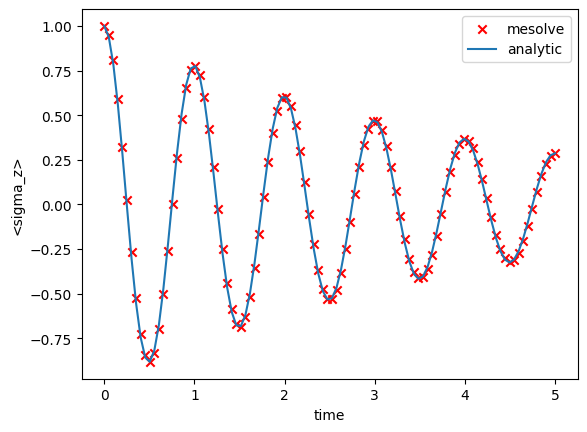

In [6]:
plt.scatter(tlist, res.expect[0], c='r', marker = 'x', label = 'mesolve')
plt.plot(tlist, sz_analytic, label='analytic')
plt.xlabel('time'), plt.ylabel('<sigma_z>')
plt.legend()

In [7]:
res = mesolve(H, psi_0, tlist, [], [sigmax(), sigmay(), sigmaz()])

In [8]:
res.expect

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.00000000e+00, -3.12033387e-01, -5.92907761e-01, -8.14575702e-01,
        -9.54902020e-01, -9.99874145e-01, -9.45001286e-01, -7.95762900e-01,
        -5.67061551e-01, -2.81734731e-01,  3.17255377e-02,  3.42017823e-01,
         6.18156923e-01,  8.32568273e-01,  9.63841327e-01,  9.98867504e-01,
         9.34149220e-01,  7.76149063e-01,  5.40644529e-01,  2.51152460e-01,
        -6.34191862e-02, -3.71657978e-01, -6.42783802e-01, -8.49722682e-01,
        -9.71810275e-01, -9.96855237e-01, -9.22356680e-01, -7.55753819e-01,
        -5.1368319

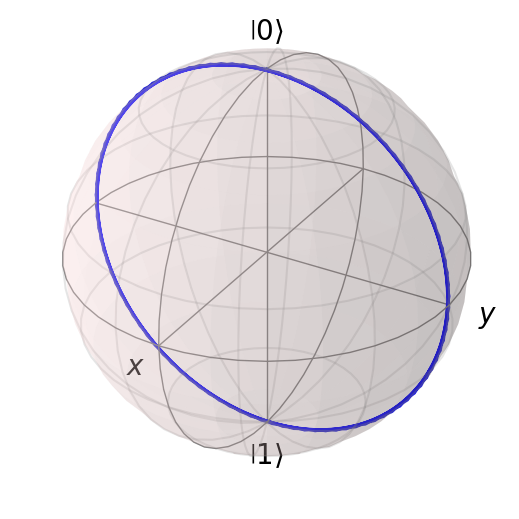

In [9]:
sphere = Bloch()

exp_sx, exp_sy, exp_sz = res.expect

sphere.add_points([exp_sx, exp_sy, exp_sz], meth='l')

sphere.show()

In [10]:
res = mesolve(H, psi_0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])

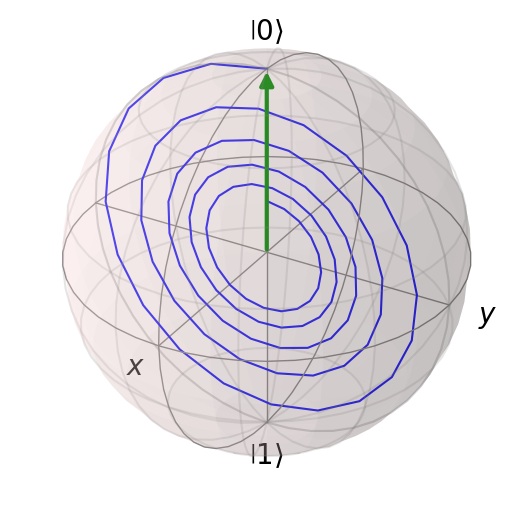

In [11]:
exp_sx, exp_sy, exp_sz = res.expect

sphere = Bloch()
sphere.add_points([exp_sx, exp_sy, exp_sz], meth='l')
sphere.add_states(psi_0)
sphere.show()

## Dephasing

In [12]:
# Angle
theta = 0.15 * np.pi

# Hamiltonian
H = delta * (np.cos(theta) * sigmaz() + np.sin(theta) * sigmax())

tlist = np.linspace(0,5,1000)
res = mesolve(H, psi_0, tlist, [], [sigmax(), sigmay(), sigmaz()])

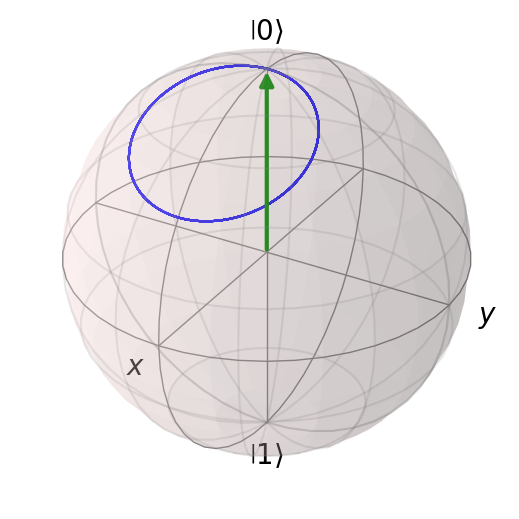

In [13]:
exp_sx, exp_sy, exp_sz = res.expect

sphere = Bloch()
sphere.add_points([exp_sx, exp_sy, exp_sz], meth='l')
sphere.add_states(psi_0)
sphere.show()

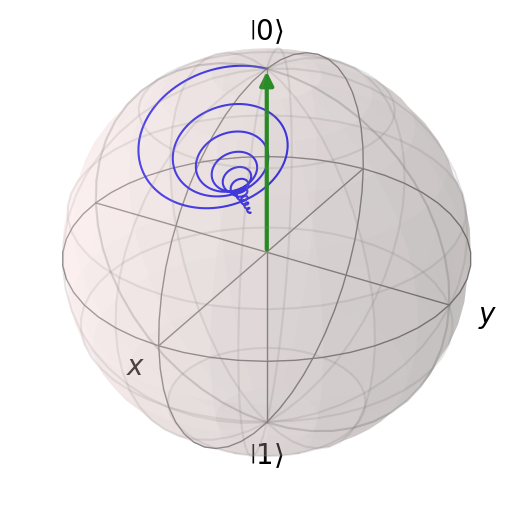

In [14]:
gamma_phase = 0.5
c_ops = [np.sqrt(gamma_phase) * sigmaz()]

# solve master equation
res = mesolve(H, psi_0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])
exp_sx, exp_sy, exp_sz = res.expect


sphere = Bloch()
sphere.add_points([exp_sx, exp_sy, exp_sz], meth='l')
sphere.add_states(psi_0)
sphere.show()

## Relaxation

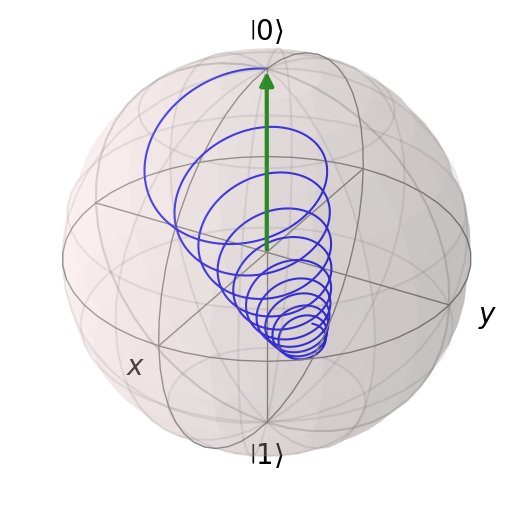

In [15]:
gamma_relax = 0.5
c_ops = [np.sqrt(gamma_relax) * sigmam()]

# solve dynamics
result = mesolve(H, psi_0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])
exp_sx_relax, exp_sy_relax, exp_sz_relax = result.expect

# Create Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_relax, exp_sy_relax, exp_sz_relax], meth="l")
sphere.add_states(psi_0)
sphere.show()

## Building Circuit

c:\Users\이찬영\AppData\Local\Programs\Python\Python311\Lib\site-packages\qutip\qip\circuit.py:242: UserWarning: Unknown gate cH
  warnings.warn("Unknown gate %s" % name)


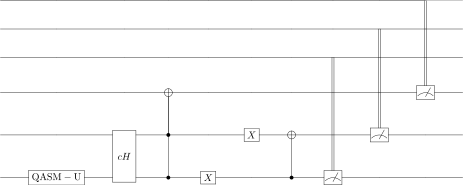

In [16]:
from qutip.qip.circuit import QubitCircuit, Gate
from qutip.qip.operations import controlled_gate, hadamard_transform
def controlled_hadamard():
    # Controlled Hadamard
    return controlled_gate(
        hadamard_transform(1), 2, control=0, target=1, control_value=1)
qc = QubitCircuit(N=3, num_cbits=3)
qc.user_gates = {"cH": controlled_hadamard}
qc.add_gate("QASMU", targets=[0], arg_value=[1.91063, 0, 0])
qc.add_gate("cH", targets=[0,1])
qc.add_gate("TOFFOLI", targets=[2], controls=[0, 1])
qc.add_gate("X", targets=[0])
qc.add_gate("X", targets=[1])
qc.add_gate("CNOT", targets=[1], controls=0)
qc.add_measurement("M0", targets=[0], classical_store=0)
qc.add_measurement("M1", targets=[1], classical_store=1)
qc.add_measurement("M2", targets=[2], classical_store=2)

qc.svg

In [17]:
from qutip import tensor
zero_state = tensor(basis(2, 0), basis(2, 0), basis(2, 0))
result = qc.run(state=zero_state)
wstate = result

print(wstate)

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [18]:
result = qc.run_statistics(state=tensor(basis(2, 0), basis(2, 0), basis(2, 0)))
states = result.get_final_states()
probabilities = result.get_probabilities()

for state, probability in zip(states, probabilities):
    print("State:\n{}\nwith probability {}".format(state, probability))

State:
Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
with probability 0.3333325705416881
State:
Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
with probability 0.3333325705416881
State:
Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]
with probability 0.33333485891662384


## Circuit Simulation

In [19]:
from qutip.qip.circuit import CircuitSimulator

sim = CircuitSimulator(qc, state = zero_state)

In [20]:
print(sim.step())

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.57735159]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.81649565]
 [0.        ]
 [0.        ]
 [0.        ]]


### Precomputing unitary

In [21]:
sim = CircuitSimulator(qc, precompute_unitary=True)

op = sim.ops[0]

op

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.          0.57734961  0.         -0.57734961  0.          0.40824922
   0.         -0.40824922]
 [ 0.57734961  0.         -0.57734961  0.          0.40824922  0.
  -0.40824922  0.        ]
 [ 0.57734961  0.          0.57734961  0.          0.40824922  0.
   0.40824922  0.        ]
 [ 0.          0.57734961  0.          0.57734961  0.          0.40824922
   0.          0.40824922]
 [ 0.57735159  0.          0.          0.         -0.81649565  0.
   0.          0.        ]
 [ 0.          0.57735159  0.          0.          0.         -0.81649565
   0.          0.        ]
 [ 0.          0.          0.57735159  0.          0.          0.
  -0.81649565  0.        ]
 [ 0.          0.          0.          0.57735159  0.          0.
   0.         -0.81649565]]

### Density Matrix Simulation

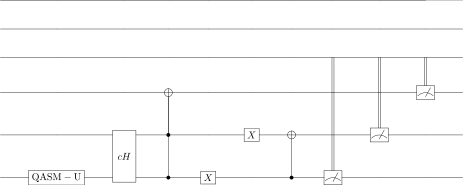

In [22]:
qc = QubitCircuit(N=3, num_cbits=3)
qc.user_gates = {"cH": controlled_hadamard}
qc.add_gate("QASMU", targets=[0], arg_value=[1.91063, 0, 0])
qc.add_gate("cH", targets=[0,1])
qc.add_gate("TOFFOLI", targets=[2], controls=[0, 1])
qc.add_gate("X", targets=[0])
qc.add_gate("X", targets=[1])
qc.add_gate("CNOT", targets=[1], controls=0)
qc.add_measurement("M0", targets=[0], classical_store=0)
qc.add_measurement("M0", targets=[1], classical_store=0)
qc.add_measurement("M0", targets=[2], classical_store=0)
sim = CircuitSimulator(qc, mode="density_matrix_simulator")
sim.run(zero_state).get_final_states()[0]

qc.svg

In [182]:
t1_relax = 0.0
t2_dephase = 0.3

delta = 1.2*np.pi

H = delta / 2.0 * sigmaz()

c_ops = [np.sqrt(t2_dephase) * sigmaz(), np.sqrt(t1_relax) * sigmap()]

psi_0 = (basis(2,0) + basis(2,1)) / np.sqrt(2)

tlist = np.linspace(0,5,100)

res = mesolve(H, psi_0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])

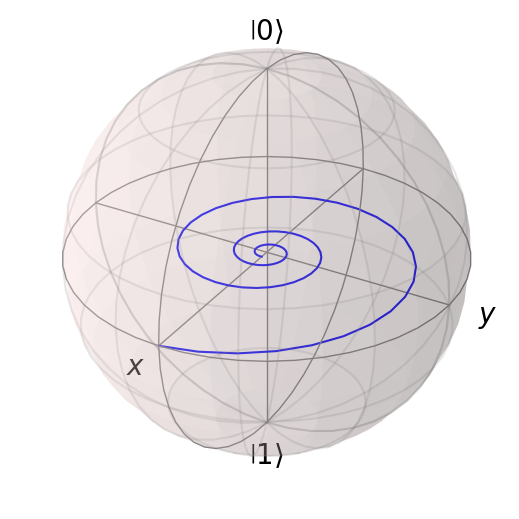

In [183]:
exp_x, exp_y, exp_z = res.expect

sphere = Bloch()

sphere.add_points([exp_x, exp_y, exp_z], meth='l')

sphere.show()

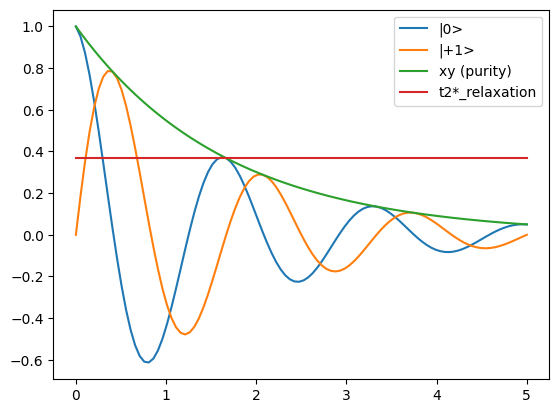

In [197]:
xy = (res.expect[0] **2 + res.expect[1]**2)**0.5

x = res.expect[0]
y = res.expect[1]

e = [1/np.e] * 100

plt.plot(tlist, x, label = '|0>')
plt.plot(tlist, y, label = '|+1>')
plt.plot(tlist, xy, label = 'xy (purity)')
plt.plot(tlist, e, label = 't2*_relaxation')

plt.legend()
plt.show()

# 빨강과 초록의 교점 = T2*

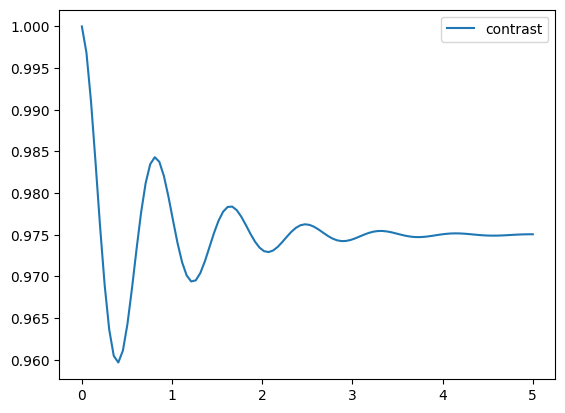

In [198]:
t2_star = x**2 - y**2

graph = 0.05*(t2_star+1)/2 + 0.95

plt.cla()
plt.plot(tlist, graph, label = 'contrast')
plt.legend()
plt.show()